In [1]:
import pandas as pd
df=pd.read_csv("c:/data/rides/rides2.csv")
print(df.head())

   weekend  num.child    distance  rides  games  wait  clean  overall
0        1          0  114.648259     87     73    60     89        0
1        1          2   27.014097     87     78    76     87        1
2        0          1   63.300975     85     80    70     88        1
3        1          0   25.909931     88     72    66     89        0
4        0          4   54.718307     84     87    74     87        1


In [2]:
df.columns

Index(['weekend', 'num.child', 'distance', 'rides', 'games', 'wait', 'clean',
       'overall'],
      dtype='object')

In [3]:
df.shape

(500, 8)

In [4]:
df.describe()

,weekend,num.child,distance,rides,games,wait,clean,overall
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,0.482000,1.738000,31.047509,85.84600,78.666000,69.896000,87.898000,0.510000
std,0.500176,1.495938,33.145445,5.46278,8.123202,10.770757,5.115068,0.500401
min,0.000000,0.000000,0.526723,72.00000,57.000000,40.000000,74.000000,0.000000
25%,0.000000,0.000000,10.318091,82.00000,73.000000,62.000000,84.000000,0.000000
50%,0.000000,2.000000,19.019093,86.00000,78.000000,70.000000,88.000000,1.000000
75%,1.000000,3.000000,39.582050,90.00000,85.000000,77.000000,91.000000,1.000000
max,1.000000,5.000000,239.192134,100.00000,100.000000,100.000000,100.000000,1.000000


In [5]:
df.groupby("overall").mean()

,weekend,num.child,distance,rides,games,wait,clean
overall,,,,,,,
0,0.502041,1.257143,29.079426,83.363265,75.718367,65.208163,85.355102
1,0.462745,2.200000,32.938412,88.231373,81.498039,74.400000,90.341176


In [6]:
df["overall"].value_counts()

1    255
0    245
Name: overall, dtype: int64

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='overall', ylabel='count'>

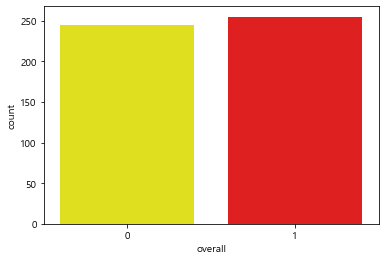

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc

font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
colors=["yellow","red"]
sns.countplot('overall', data=df, palette=colors)

In [9]:
train_cols=df.columns[0:7]
X=df[train_cols]
y=df["overall"]
print(type(X),type(y))
print(X.head())
print(y.head())

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
   weekend  num.child    distance  rides  games  wait  clean
0        1          0  114.648259     87     73    60     89
1        1          2   27.014097     87     78    76     87
2        0          1   63.300975     85     80    70     88
3        1          0   25.909931     88     72    66     89
4        0          4   54.718307     84     87    74     87
0    0
1    1
2    1
3    0
4    1
Name: overall, dtype: int64


array([[<AxesSubplot:xlabel='weekend', ylabel='weekend'>,
        <AxesSubplot:xlabel='num.child', ylabel='weekend'>,
        <AxesSubplot:xlabel='distance', ylabel='weekend'>,
        <AxesSubplot:xlabel='rides', ylabel='weekend'>,
        <AxesSubplot:xlabel='games', ylabel='weekend'>,
        <AxesSubplot:xlabel='wait', ylabel='weekend'>,
        <AxesSubplot:xlabel='clean', ylabel='weekend'>,
        <AxesSubplot:xlabel='overall', ylabel='weekend'>],
       [<AxesSubplot:xlabel='weekend', ylabel='num.child'>,
        <AxesSubplot:xlabel='num.child', ylabel='num.child'>,
        <AxesSubplot:xlabel='distance', ylabel='num.child'>,
        <AxesSubplot:xlabel='rides', ylabel='num.child'>,
        <AxesSubplot:xlabel='games', ylabel='num.child'>,
        <AxesSubplot:xlabel='wait', ylabel='num.child'>,
        <AxesSubplot:xlabel='clean', ylabel='num.child'>,
        <AxesSubplot:xlabel='overall', ylabel='num.child'>],
       [<AxesSubplot:xlabel='weekend', ylabel='distance'>,
       

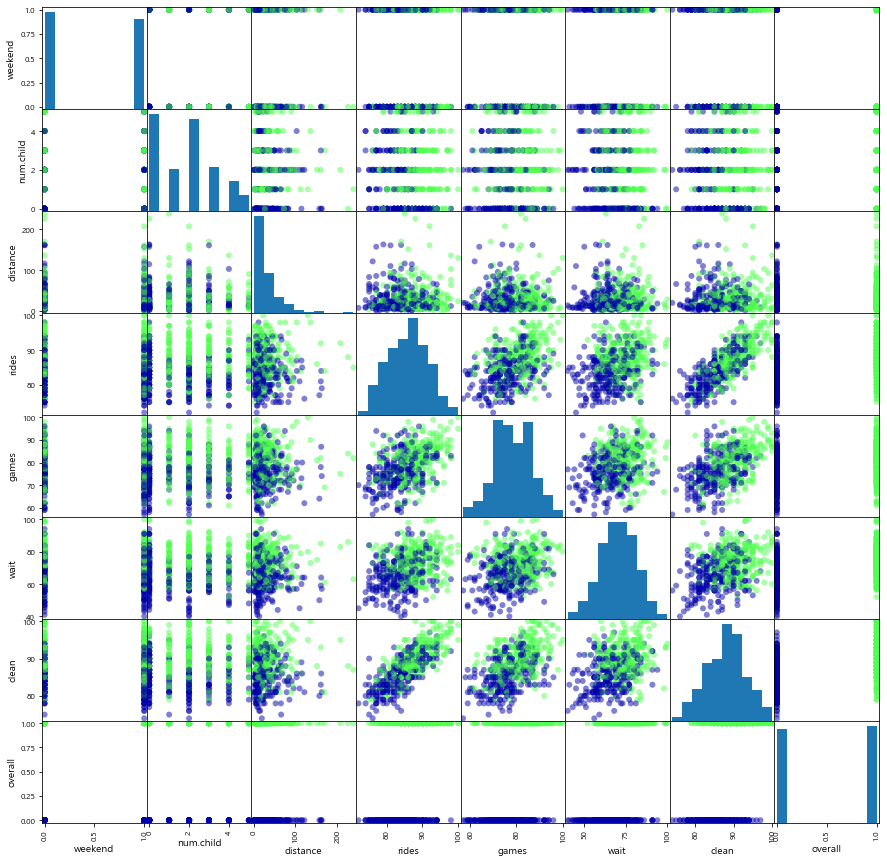

In [10]:
import mglearn
pd.plotting.scatter_matrix(df, c=y,figsize=(15,15),marker='0',cmap=mglearn.cm3)

In [11]:
from imblearn.under_sampling import RandomUnderSampler
X_sample,y_sample=RandomUnderSampler(random_state=0).fit_resample(X,y)
X_samp=pd.DataFrame(data=X_sample,columns=train_cols)
y_samp=pd.DataFrame(data=y_sample,columns=['overall'])
df_samp=pd.concat([X_samp,y_samp],axis=1)

In [12]:
df_samp["overall"].value_counts()

0    245
1    245
Name: overall, dtype: int64

In [13]:
X = df_samp[train_cols]
y = df_samp["overall"]

In [14]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=10)

In [26]:
from tensorflow.keras.models import Sequential
from keras.layers.core import Dense, Dropout

def make_model(input_number,hidden_layers,output_number):
    model=Sequential()
    model.add(Dense(hidden_layers[0],activation="relu", input_shape=(input_number,),name="Input"))
    model.add(Dense(hidden_layers[1],activation='relu',name="Hidden-1"))
    model.add(Dense(hidden_layers[2],activation='relu',name="Hidden-2"))
    model.add(Dropout(0.2))
    model.add(Dense(output_number, activation="sigmoid",name='output'))
    model.compile(loss="mse", optimizer="adam",metrics=["accuracy"])
    return model


In [27]:
model = make_model(len(X_train.columns), [128,64,32], 1)

<AxesSubplot:>

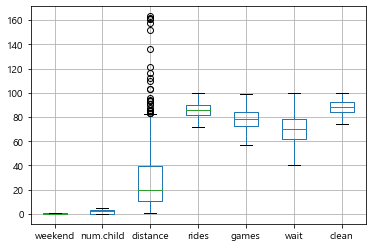

In [28]:
X_train.boxplot()

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
print(X_train_scaled)

[[1.         0.         0.10977143 ... 0.5952381  0.16666667 0.65384615]
 [1.         0.4        0.13554088 ... 0.28571429 0.43333333 0.19230769]
 [0.         0.6        0.06495305 ... 0.5        0.48333333 0.30769231]
 ...
 [0.         0.6        0.0730179  ... 0.66666667 0.68333333 0.73076923]
 [1.         0.4        0.41020732 ... 0.33333333 0.3        0.5       ]
 [1.         0.4        0.31775348 ... 0.4047619  0.68333333 0.46153846]]


<AxesSubplot:>

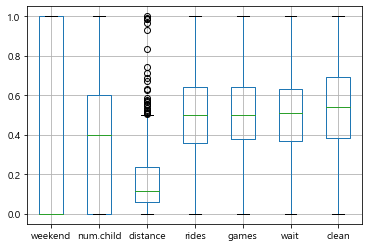

In [30]:
df3=pd.DataFrame(X_train_scaled,columns=train_cols)
df3.boxplot()

In [31]:
hist = model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2476 - accuracy: 0.5485
Epoch 2/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2372 - accuracy: 0.6429
Epoch 3/100
13/13 [==============================] - 0s 974us/step - loss: 0.2276 - accuracy: 0.6837
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2205 - accuracy: 0.6811
Epoch 5/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2054 - accuracy: 0.7270
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 0.1961 - accuracy: 0.7423
Epoch 7/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1786 - accuracy: 0.7602
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 0.1646 - accuracy: 0.7908
Epoch 9/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1539 - accuracy: 0.7934
Epoch 10/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1477 - accuracy: 0.7832
Epoch 1

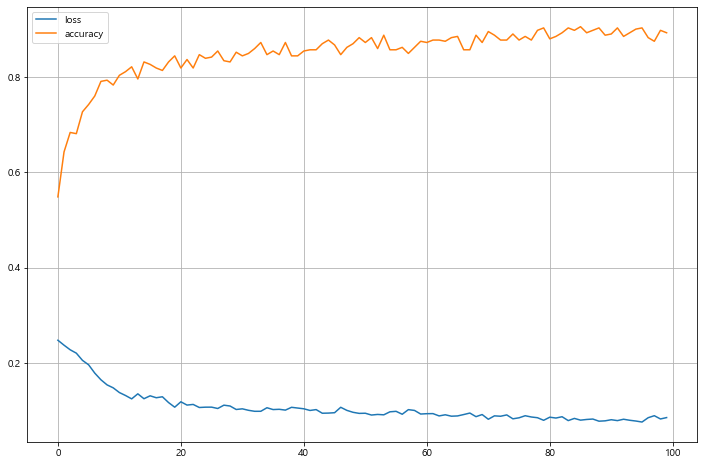

In [32]:
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss']) 
plt.plot(hist.history['accuracy']) 
plt.legend(['loss','accuracy'])
plt.grid()
plt.show()

In [33]:
scores = model.evaluate(X_train_scaled, y_train, verbose=1)
print(scores)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

scores = model.evaluate(X_test_scaled, y_test, verbose=1)
print(scores)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

13/13 [==============================] - 0s 816us/step - loss: 0.0809 - accuracy: 0.8827
[0.08085518330335617, 0.8826530575752258]
accuracy: 88.27%
4/4 [==============================] - 0s 2ms/step - loss: 0.1527 - accuracy: 0.8061
[0.1526956409215927, 0.8061224222183228]
accuracy: 80.61%


In [34]:
model.save('c:/data/rides/rides_keras.model')
model.save_weights('c:/data/rides/rides.weight')

INFO:tensorflow:Assets written to: c:/data/rides/rides_keras.model\assets


INFO:tensorflow:Assets written to: c:/data/rides/rides_keras.model\assets


In [35]:
pred=model.predict(X_test_scaled[:5])
pred

array([[0.96151805],
       [0.0032641 ],
       [0.17139125],
       [0.5351339 ],
       [0.9117811 ]], dtype=float32)

In [36]:
import numpy as np
test_set = np.array([0, 2, 20, 84, 78, 67, 89]).reshape(1,7)
test_set_scaled=scaler.transform(test_set)
print(model.predict(test_set_scaled))
test_set = np.array([1, 0, 10, 90, 78, 67, 89]).reshape(1,7)
test_set_scaled=scaler.transform(test_set)
print(model.predict(test_set_scaled))

[[0.9052539]]
[[0.0865761]]


In [37]:
import joblib
#scaler 백업
joblib.dump(scaler, 'c:/data/rides/scaler.sav')
#scaler 복원
scaler = joblib.load('c:/data/rides/scaler.sav')